In [6]:
# Standard imports for playing with images

import cv2
from matplotlib import pyplot as plt
import tiling_functions

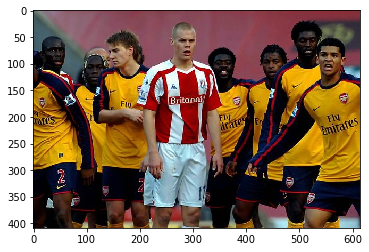

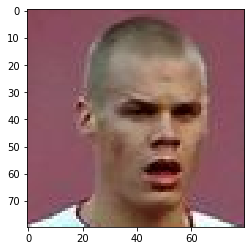

In [2]:
# Importing images as an np array. The -1 means in full colour, which cv2 does as BGR rather than RGB

img = cv2.imread('0_1889651.jpg', -1)

# Alternative way to display images, need all three together or Python will crash
# This is the one to use if you want to click on an image to get coordinates, colour, etc
# cv2.imshow('window name', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Plotting images

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Cropping and plotting

template = img[20:100, 240:320]
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.show()

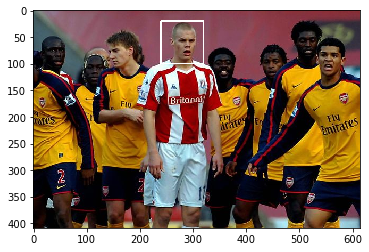

In [3]:
# Locate_template uses a correlation, which is great for images that match size and orientation

MPx, MPy = tiling_functions.locate_template(img, template)

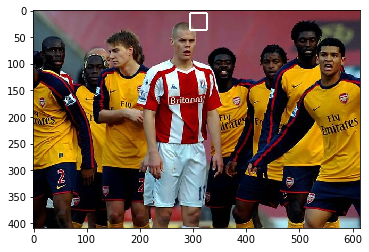

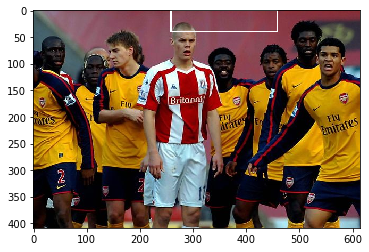

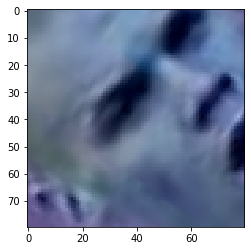

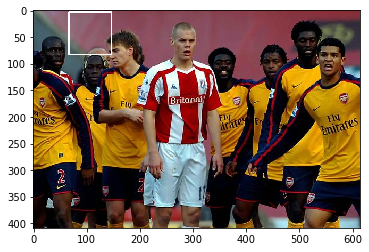

In [12]:
# ... but fails if they're scaled or rotated

template_resized = cv2.resize(template, (0,0), fx = 0.4, fy=0.4)
MPx, MPy = tiling_functions.locate_template(img, template_resized, display_plot = False)

template_resized = cv2.resize(template, (0,0), fx = 2.5, fy=0.5)
MPx, MPy = tiling_functions.locate_template(img, template_resized)

template_resized = tiling_functions.rotate(template, 54, scale = 2.1)
plt.imshow(template_resized)
plt.show()
MPx, MPy = tiling_functions.locate_template(img, template_resized)

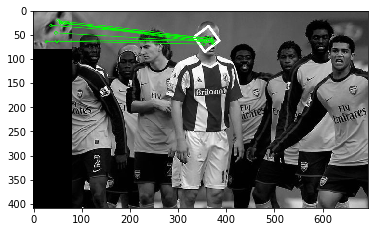

[[ 2.22342360e-01 -4.43596891e-01  2.84421540e+02]
 [ 3.68416095e-01  2.64240841e-01  3.37233733e+01]
 [-1.93088493e-04 -2.31769755e-04  1.00000000e+00]]


In [5]:
# Tile is using cv2 homography to solve for rotation, scale and position

print(tiling_functions.tile(template_resized, img, thresh=9))